參考資料 : https://github.com/andy6804tw/2021-13th-ironman/tree/main/3.%E4%BD%A0%E7%9C%9F%E4%BA%86%E8%A7%A3%E8%B3%87%E6%96%99%E5%97%8E%EF%BC%9F%E8%A9%A6%E8%A9%A6%E7%9C%8B%E8%A6%96%E8%A6%BA%E5%8C%96%E5%88%86%E6%9E%90%E5%90%A7%EF%BC%81

## 探索式數據分析 (Exploratory Data Analysis, EDA)
探索式資料分析 (Exploratory Data Analysis, EDA)，主要概念是利用數據統計的方式視覺化資料。透過資料的探索式分析可以查看資料集當中每個特徵彼此的重要程度以及其資料分布狀況，有良好的數據分析習慣能夠幫助你更了解資料集的特性。另外做 EDA 的好處是可以從各種面向先了解資料的狀況，以利後續的模型分析

* 資料處理 – Pandas, Numpy
    - Pandas：Python 表格資料處理的重要工具
    - Numpy：針對多維陣列的平行運算進行優化的強大函式庫
* 繪圖相關 – Matplotlib, Seaborn
    - Matplotlib：Python 最常被使用到的繪圖套件
    - Seaborn：以 matplotlib 為底層的高階繪圖套件

#### 鳶尾花朵資料集
此資料集總共有4個輸入特徵。分別為花萼長度、花萼寬度、花瓣長度與花瓣寬度。輸出特徵為花朵的品種，共有三種類別分別為 0: iris setosa、 1: iris versicolor、 2: iris virginica。




#### 載入資料
首先我們載入資料探索式分析所需的套件。分別有進行數據處理的函式庫的 pandas、高階大量的維度陣列與矩陣運算的 numpy、處理資料視覺化的繪圖庫 matplotlib 與 seaborn。最後一個是資料集來源，此系列範例我們採用 Sklearn 所提供的鳶尾花分類的資料集。\
\
其中，Sklearn 套件中提供了七個快速入門的 Toy datasets 很推薦初學者可以載入來玩玩看，並且練習做資料探索與建模。每一個資料集呼叫的方法非常簡單。以鳶尾花朵資料集為例，我們可以透過 API 取得輸入與輸出

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
# 輸入特徵
X = iris.data
# 輸出特徵
y = iris.target

##### Sklearn 提供了許多 API 方法可以呼叫：

* data: 取得輸入特徵
* target: 取得輸出特徵
* feature_names: 取得輸入特徵的名稱
* target_names: 取得輸出的類別標籤(分類資料集)
* DESCR: 資料集詳細描述
##### 如果想試試其他的資料集可以參考：

* 迴歸問題
    - load_boston 波士頓房價預測
    - load_diabetes 糖尿病預測
    - load_linnerud 體能評估預測
* 分類問題
    - load_iris 鳶尾花種類預測
    - load_digits 手寫數字辨識
    - load_wine 葡萄酒種類預測
    - load_breast_cancer 乳癌預測\

參考 : https://zhuanlan.zhihu.com/p/95412564

#### 載入資料集
為了方便分析我們將載入的鳶尾花資料格式(numpy)轉換成 DataFrame 的格式進行資料探索。因為透過 Pandas 的 DataFrame 格式我們更能用表格的形式觀察資料。

In [3]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], #np.c[] : 按行合併
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


#### 直方圖(histogram)
直方圖是一種對數據分布情況的圖形表示，是一種二維統計圖表。我們可以直接呼叫 Pandas 內建函式 hist() 進行直方圖分析。其中我們可以設定 bins(箱數)，預設值為 10。如果設定的輸量越大，其代表需要分割的精度越細。通常取一個適當的箱數即可觀察該特徵在資料集中的分佈情況。\
藉由直方圖我們可以知道每個值域的分佈大小與數量。\
我們也能發現輸出項的類別共有三個，並且這三個類別的數量都剛好各有 50 筆資料。我們也能得知這一份資料集的輸出類別是一個非常均勻的資料。

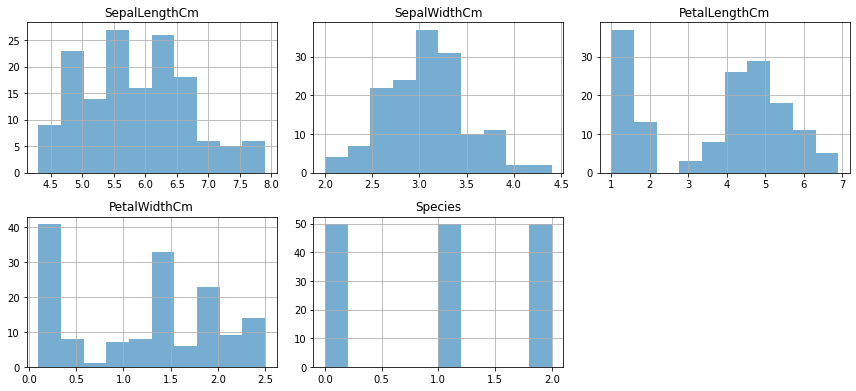

In [4]:
#直方圖 histograms
df_data.hist(alpha=0.6,layout=(3,3), figsize=(12, 8), bins=10) 
plt.tight_layout()
plt.show()

我們也可以透過 Seaborn 的 histplot 做出更詳細的直方圖分析。並利用和密度估計 kde=True 來查看每個特徵的分佈狀況。

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

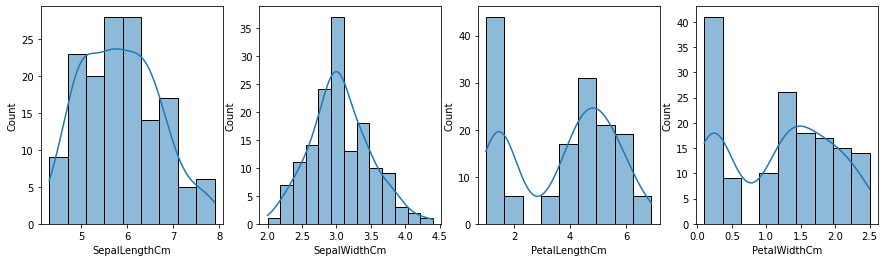

In [5]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.histplot(df_data["SepalLengthCm"][:],ax=axes[0], kde=True)
sns.histplot(df_data["SepalWidthCm"][:],ax=axes[1], kde=True)
sns.histplot(df_data["PetalLengthCm"][:],ax=axes[2], kde=True)
sns.histplot(df_data["PetalWidthCm"][:],ax=axes[3], kde=True)

#### 核密度估計
核密度估計分爲兩部分，分別有對角線部分和非對角線部分。\
在對角線部分是以核密度估計圖（Kernel Density Estimation）的方式呈現，也就是用來看某一個特徵的分佈情況，x軸對應著該特徵的數值，y軸對應著該特徵的密度也就是特徵出現的頻率。\
在非對角線的部分為兩個特徵之間分佈的關聯散點圖。將任意兩個特徵進行配對，以其中一個爲橫座標，另一個爲縱座標，將所有的數據點繪製在圖上，用來衡量兩個變量的關聯程度

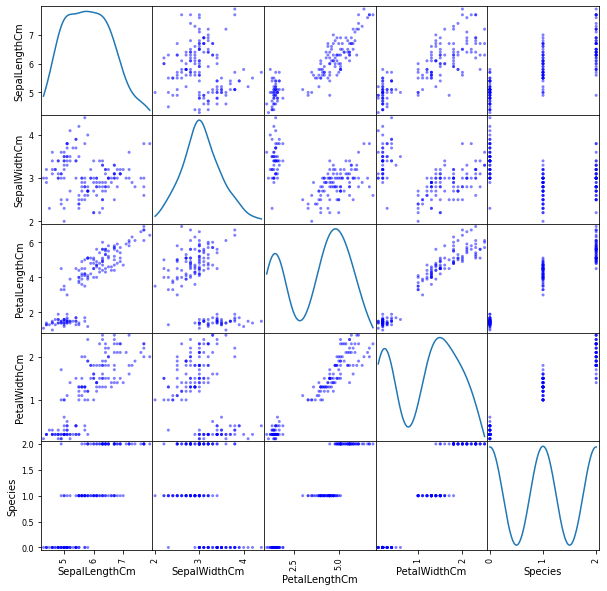

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix( df_data,figsize=(10, 10),color='b',diagonal='kde')
print()

使用 Seaborn 繪製：
* diag_king : 對角線上的圖,可改hist(直方圖), ked(密度圖)
* palette : 更改顏色

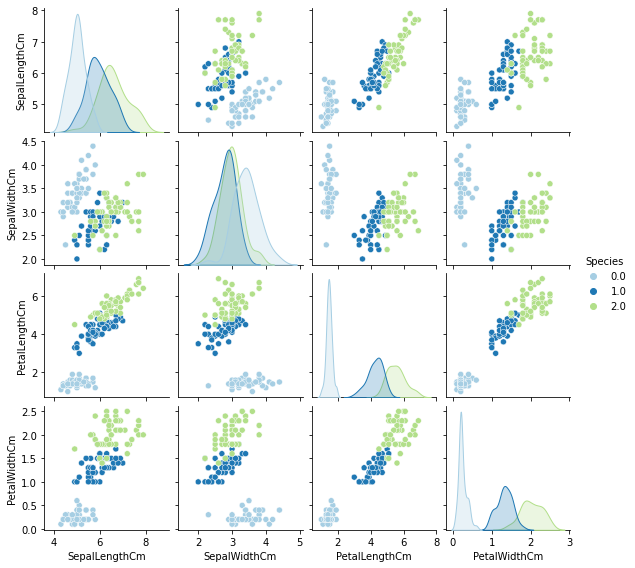

In [7]:
#from turtle import color

sns.pairplot(df_data, hue="Species", height=2, diag_kind="kde", palette = "Paired") 


#### 關聯分析
透過 pandas 的 corr() 函式可以快速的計算每個特徵間的彼此關聯程度。其區間值為-1~1之間，數字越大代表關聯程度正相關越高。相反的當負的程度很高我們可以解釋這兩個特徵之間是有很高的負 關聯性。

<AxesSubplot:>

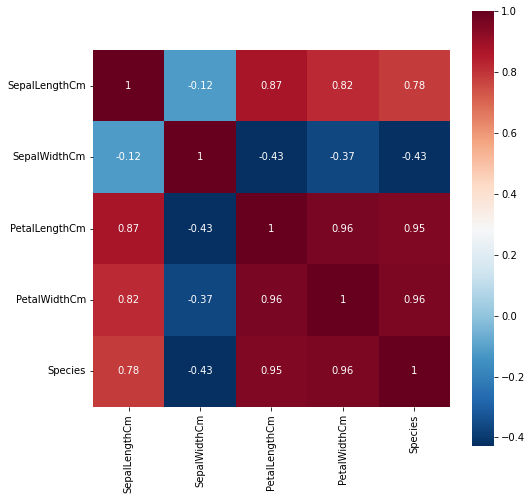

In [8]:
# correlation 計算
corr = df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

C:\Users\bluesky\AppData\Local\Temp\ipykernel_16112\1337651000.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

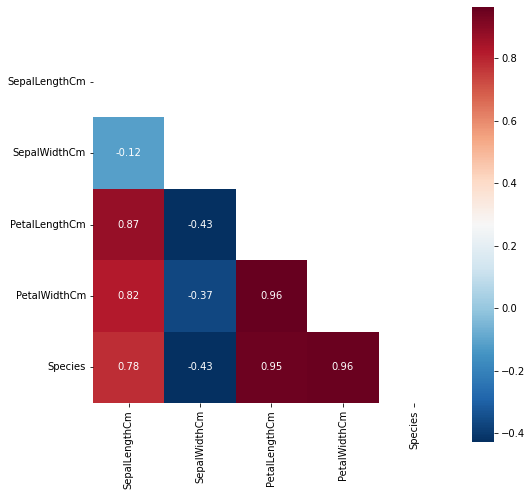

In [9]:
# correlation calculate
corr = df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
# 將矩陣型簡化為對角矩陣型
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap="RdBu_r") #center=0, cmap="YlGnBu"

#### 散佈圖
透過散佈圖我們可以從二維的平面上觀察兩兩特徵間彼此的分佈狀況。如果該特徵重要程度越高，群聚的效果會更加顯著。

c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


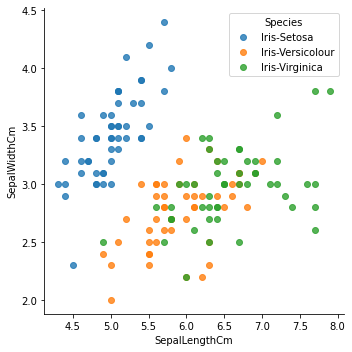

In [10]:
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='Species', loc='upper right', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])


c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


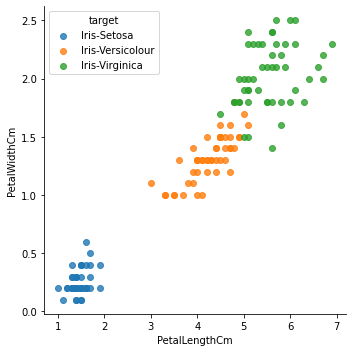

In [11]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

#### 箱形圖
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'Species')

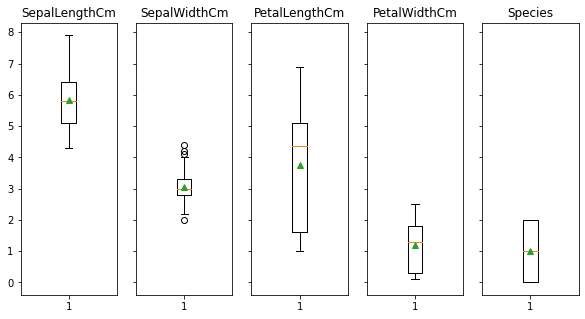

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_data['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_data['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_data['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_data['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_data['Species'],showmeans=True)
axes[4].set_title('Species')